In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
print(data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
print(data.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
import pandas as pd


# Dealing with Missing Values
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)


# dropping Cabin, PassengerId, Name, Ticket
data.drop('Cabin', axis=1, inplace=True)
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)


# Creating dummies for categorical features
data = pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])
data.drop('Sex_female', axis=1, inplace=True)
data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.50000,0,0,7.8292,False,False,True,False,True,False,True
1,47.00000,1,0,7.0000,False,False,True,False,False,True,False
2,62.00000,0,0,9.6875,False,True,False,False,True,False,True
3,27.00000,0,0,8.6625,False,False,True,False,False,True,True
4,22.00000,1,1,12.2875,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,False,False,True,False,False,True,True
414,39.00000,0,0,108.9000,True,False,False,True,False,False,False
415,38.50000,0,0,7.2500,False,False,True,False,False,True,True
416,30.27259,0,0,8.0500,False,False,True,False,False,True,True


In [7]:
print(data.isnull().sum())

Age           0
SibSp         0
Parch         0
Fare          1
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64


In [8]:


X = data.drop(['Embarked_S'], axis = 1)
y = data['Embarked_S']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 10) (105, 10) (313,) (105,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [11]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 300, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.8038379530916846


In [ ]:
##prediction
y_pred=classifier_regressor.predict(X_test)

In [ ]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8026905829596412


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       140
           1       0.72      0.77      0.74        83

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.80      0.80       223



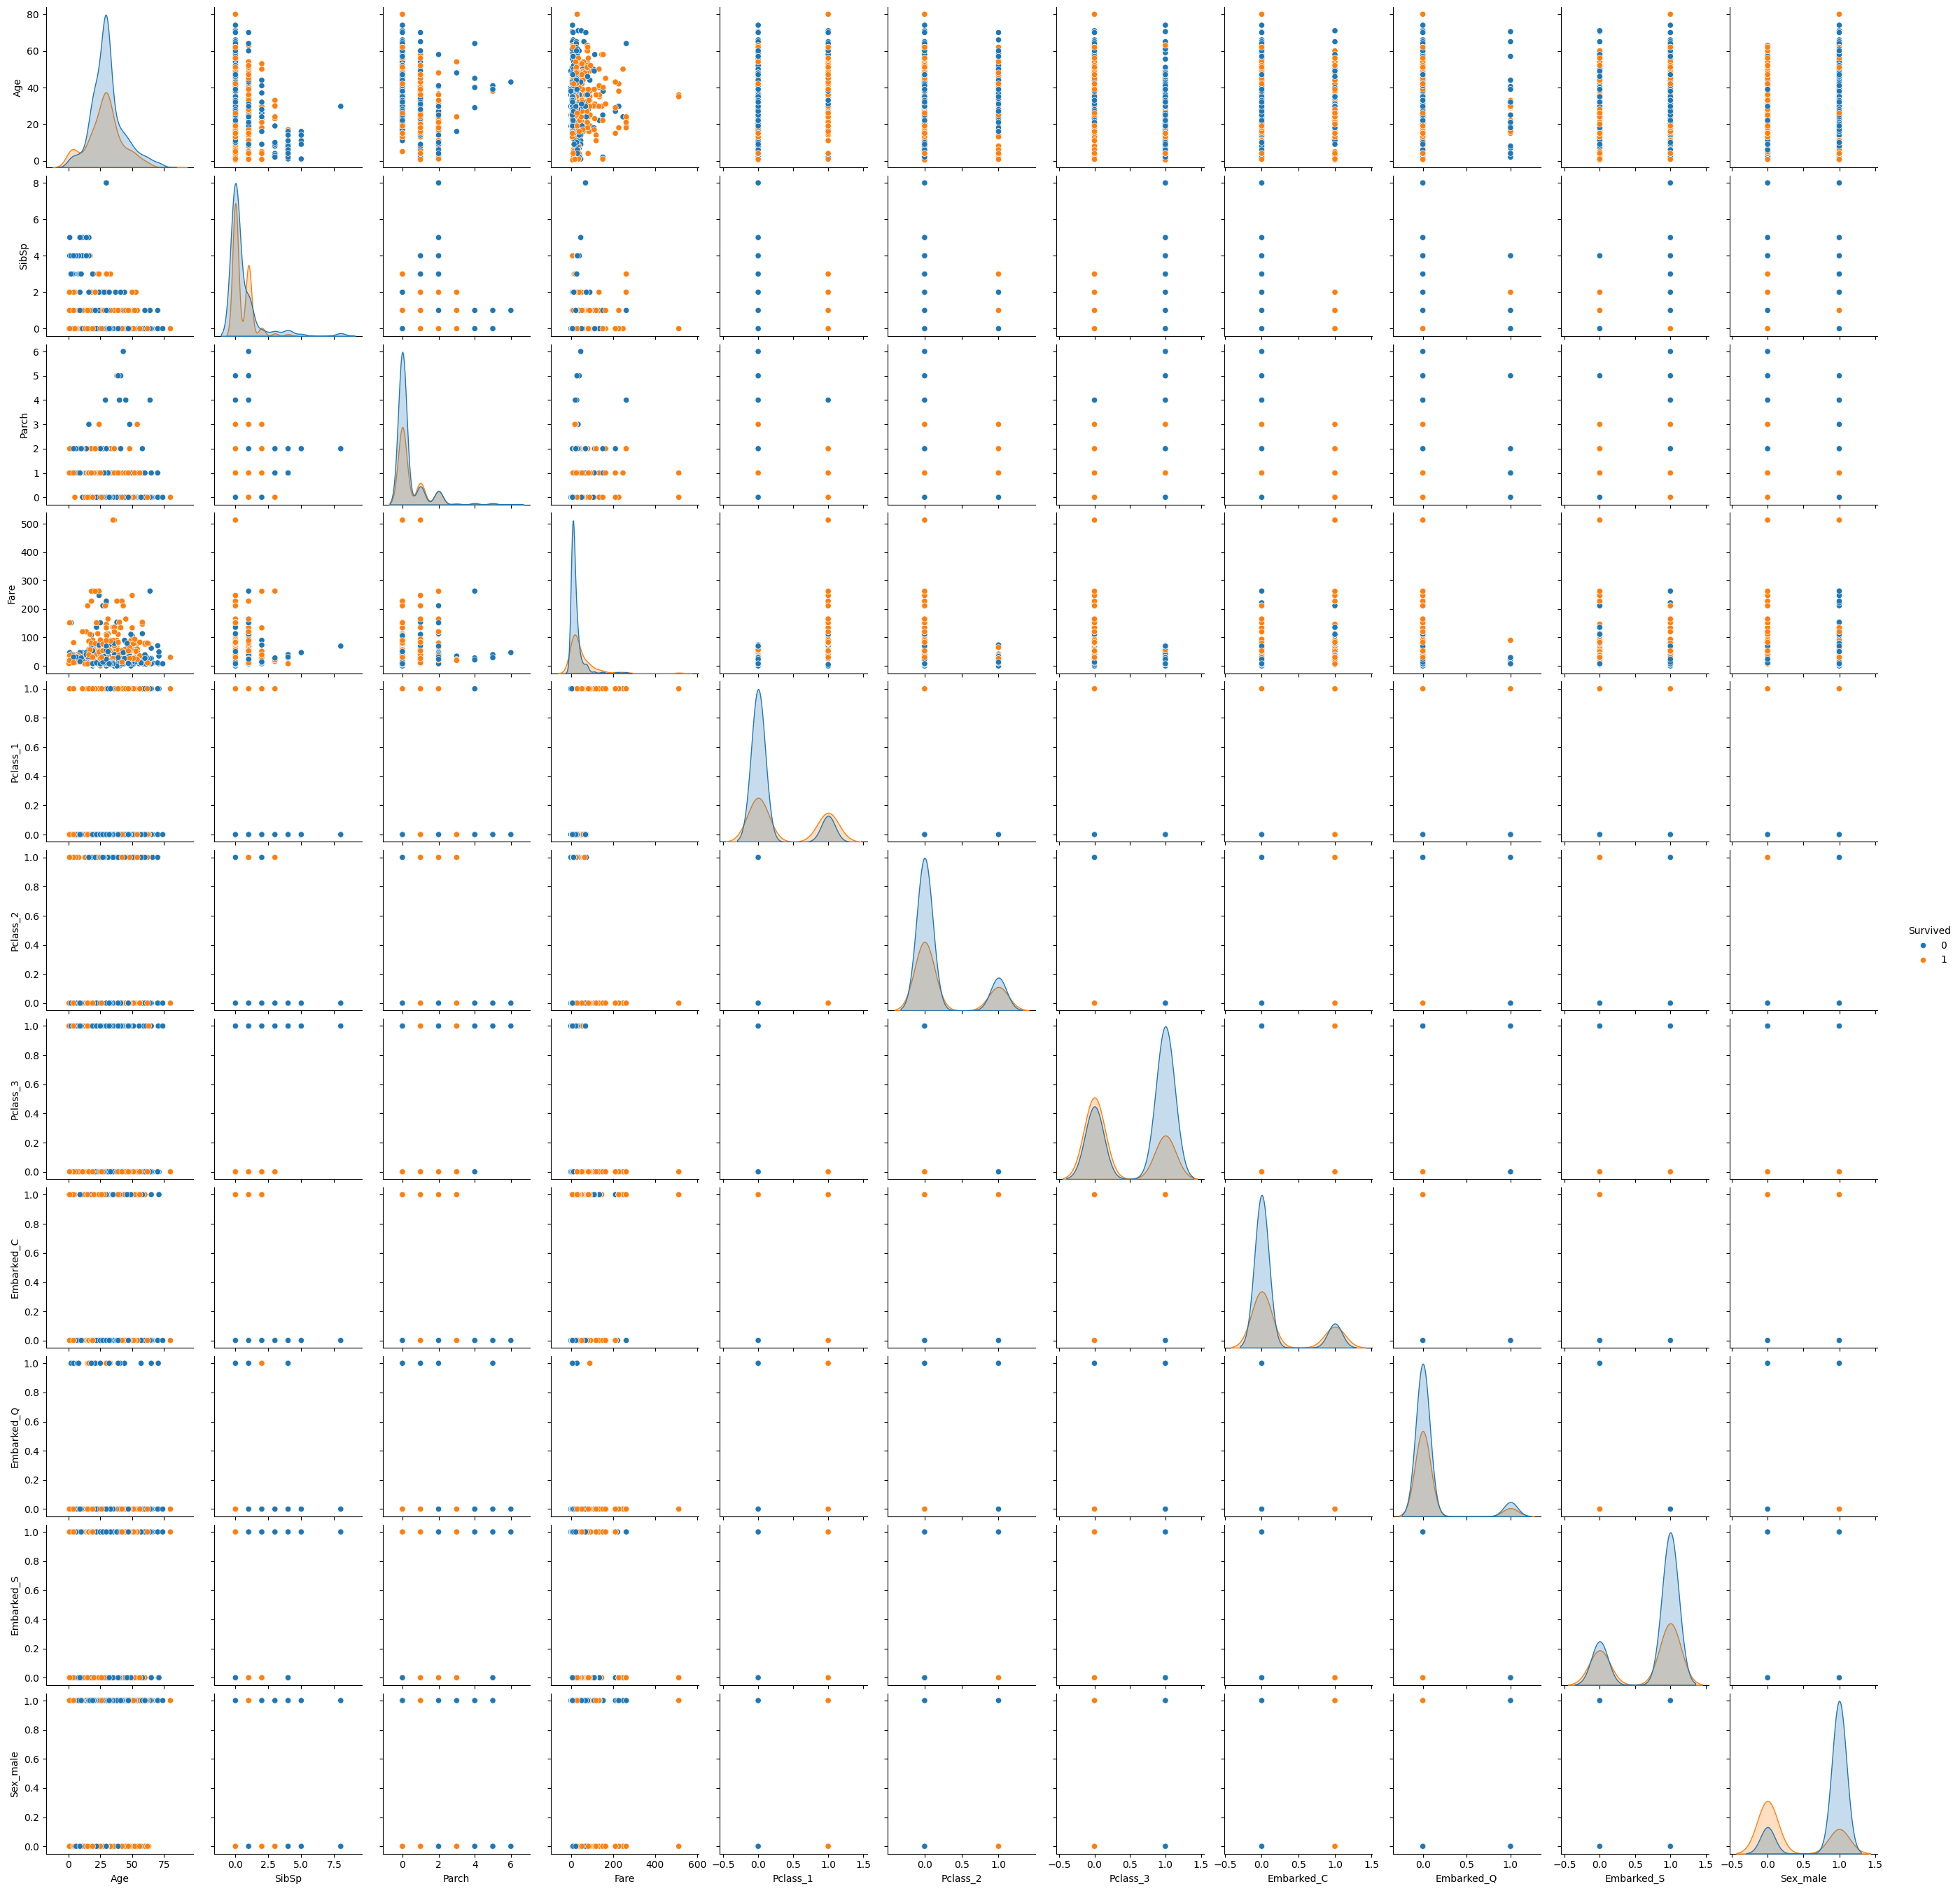

In [ ]:
##EDA
sns.pairplot(data,hue='Survived')

In [ ]:
data.corr()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,-0.543351
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.319916,0.006589,-0.281004,0.032024,-0.013855,-0.019336,0.084153
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734,-0.114631
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814,-0.245489
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,-0.182333
Pclass_1,0.285904,0.319916,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.098013
Pclass_2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.064746
Pclass_3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.137143
Embarked_C,0.168240,0.032024,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.082853
Embarked_Q,0.003650,-0.013855,-0.026354,-0.081228,-0.117216,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,-0.074115
